<a href="https://colab.research.google.com/github/bradykuo/Numerical-Optimization/blob/main/curve_fitting_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from gurobipy import*
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
I, X, Y = multidict({1:[4,102.56], 2:[4.2,113.18], 3:[4.5,130.11], 4:[4.7,142.05], 5:[5.1, 167.53],
                     6:[5.5, 195.14], 7:[5.9,224.87],8:[6.3,256.73], 9:[6.8, 299.5], 10:[7.1,626.72]})

In [ ]:
model1 = Model("Data fitting 1")
a = {}
Fx = {}
t = {}
s = {}
for i in range(1,4):#產生alpha1,alpha2,alpha3三個變數
    a[i]= model1.addVar(lb = -GRB.INFINITY,name="a[%s]" % i)
model1.update()
for i in I:#產生ti,si兩個變數
    t[i] = model1.addVar(name="t[%s]" % i)
    s[i] = model1.addVar(name="s[%s]" % i)
model1.update()
for i in I:#增加限制式
    Fx[i] = a[3]*X[i]**2 + a[2]*X[i] + a[1]
    model1.addConstr(Y[i]-Fx[i]==t[i]-s[i])

model1.setObjective(quicksum(t[i]+s[i] for i in I),GRB.MINIMIZE)
model1.optimize()
for i in range(1,4):
    print("alpha %s: "%i,a[i].X)

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[rosetta2])
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 10 rows, 23 columns and 50 nonzeros
Model fingerprint: 0xb8022add
Coefficient statistics:
  Matrix range     [1e+00, 5e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 6e+02]
Presolve time: 0.01s
Presolved: 10 rows, 23 columns, 50 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0      handle free variables                          0s
      10    2.9995832e+02   0.000000e+00   0.000000e+00      0s

Solved in 10 iterations and 0.01 seconds (0.00 work units)
Optimal objective  2.999583242e+02
alpha 1:  1.7409615384623862
alpha 2:  -1.349587912088238
alpha 3:  6.638736263736296


In [ ]:
A = np.array([1, X[1], X[1]**2])#建立A的第一列
B = np.array([Y[1]])#建立B的第一列
for i in range (2,11):#使用np.append()將2～10列的值放入array(此時為1維array)
    a1 = np.array([1, X[i], X[i]**2]) #使用a1避免a將前面的a = {}覆蓋掉
    b = np.array([Y[i]])
    A = np.append(A,a1)
    B = np.append(B,b)
A = A.reshape((10,3))#使用reshape()將A的形狀轉變為10x3
B = B.reshape(10,1)#使用reshape()將A的形狀轉變為10x1
print("A = \n" ,A)
print("B = \n",B)
At = np.transpose(A)
# compute the vector
np.matmul(np.matmul(np.linalg.inv(np.matmul(At, A)),At),B)#進行(AtA)-1Atb的運算

A = 
 [[ 1.    4.   16.  ]
 [ 1.    4.2  17.64]
 [ 1.    4.5  20.25]
 [ 1.    4.7  22.09]
 [ 1.    5.1  26.01]
 [ 1.    5.5  30.25]
 [ 1.    5.9  34.81]
 [ 1.    6.3  39.69]
 [ 1.    6.8  46.24]
 [ 1.    7.1  50.41]]
B = 
 [[102.56]
 [113.18]
 [130.11]
 [142.05]
 [167.53]
 [195.14]
 [224.87]
 [256.73]
 [299.5 ]
 [626.72]]


array([[1392.44636506],
       [-559.99464805],
       [  61.40491384]])

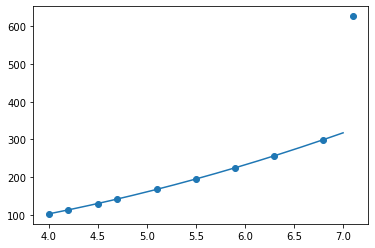

In [ ]:
#P1的圖形
x1 = np.linspace(4,7,10000)#在4~7中切出10000個點
y1 = a[3].X*x1**2 + a[2].X*x1 + a[1].X #將P1求出的alpha帶回f(x)
plt.plot(x1,y1)#繪製最佳解圖形
plt.scatter(xi,yi)#繪製data points

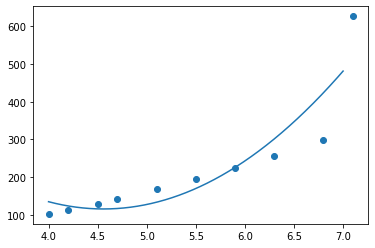

In [ ]:
#印出P2的圖形
x2 = np.linspace(4,7,10000)#在4~7中切出10000個點
y2 = 61.40491384*x2**2 - 559.99464805*x2 + 1392.44636506#將P2求出的alpha帶回f(x)
plt.plot(x2,y2)#繪製最佳解圖形
plt.scatter(xi,yi)#繪製data points